#### Guy Zepko
<br>

### Final project in the class: Information-theoretic analysis of neural language models
#### Recihman University, Fall 2022-2023


# Abstractive Summarization

## Imports & packages installations

In [ ]:
! pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

In [ ]:
!pip install transformers

In [ ]:
! pip install sentencepiece

In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

## Summarization task -  Explained

Text summarization is a practical application of context-based autoregressive generation. 
The task is to take a full-length article and produce an effective summary of it. 
To train a transformer-based autoregressive model to perform this task, we start with a corpus consisting of full-length articles accompanied by their corresponding summaries.

A language model is a statistical model that is used to predict the likelihood of a sequence of words. In the context of summarization, the language model is trained on a large dataset of text and learns to assign higher probabilities to phrases and sentences that are more important or relevant to the overall meaning of the text.

To create a summary, the language model is used to score each sentence in the text, and the highest scoring sentences are selected and combined to form the summary. The length of the summary can be controlled by adjusting the number of sentences that are included.

Summarization can be useful for a variety of tasks, such as condensing long articles for easier reading, extracting key points from a document, or generating headlines for news articles.

*Here a standard language model is given the prefix to some text and is asked to generate a possible completion to it.*

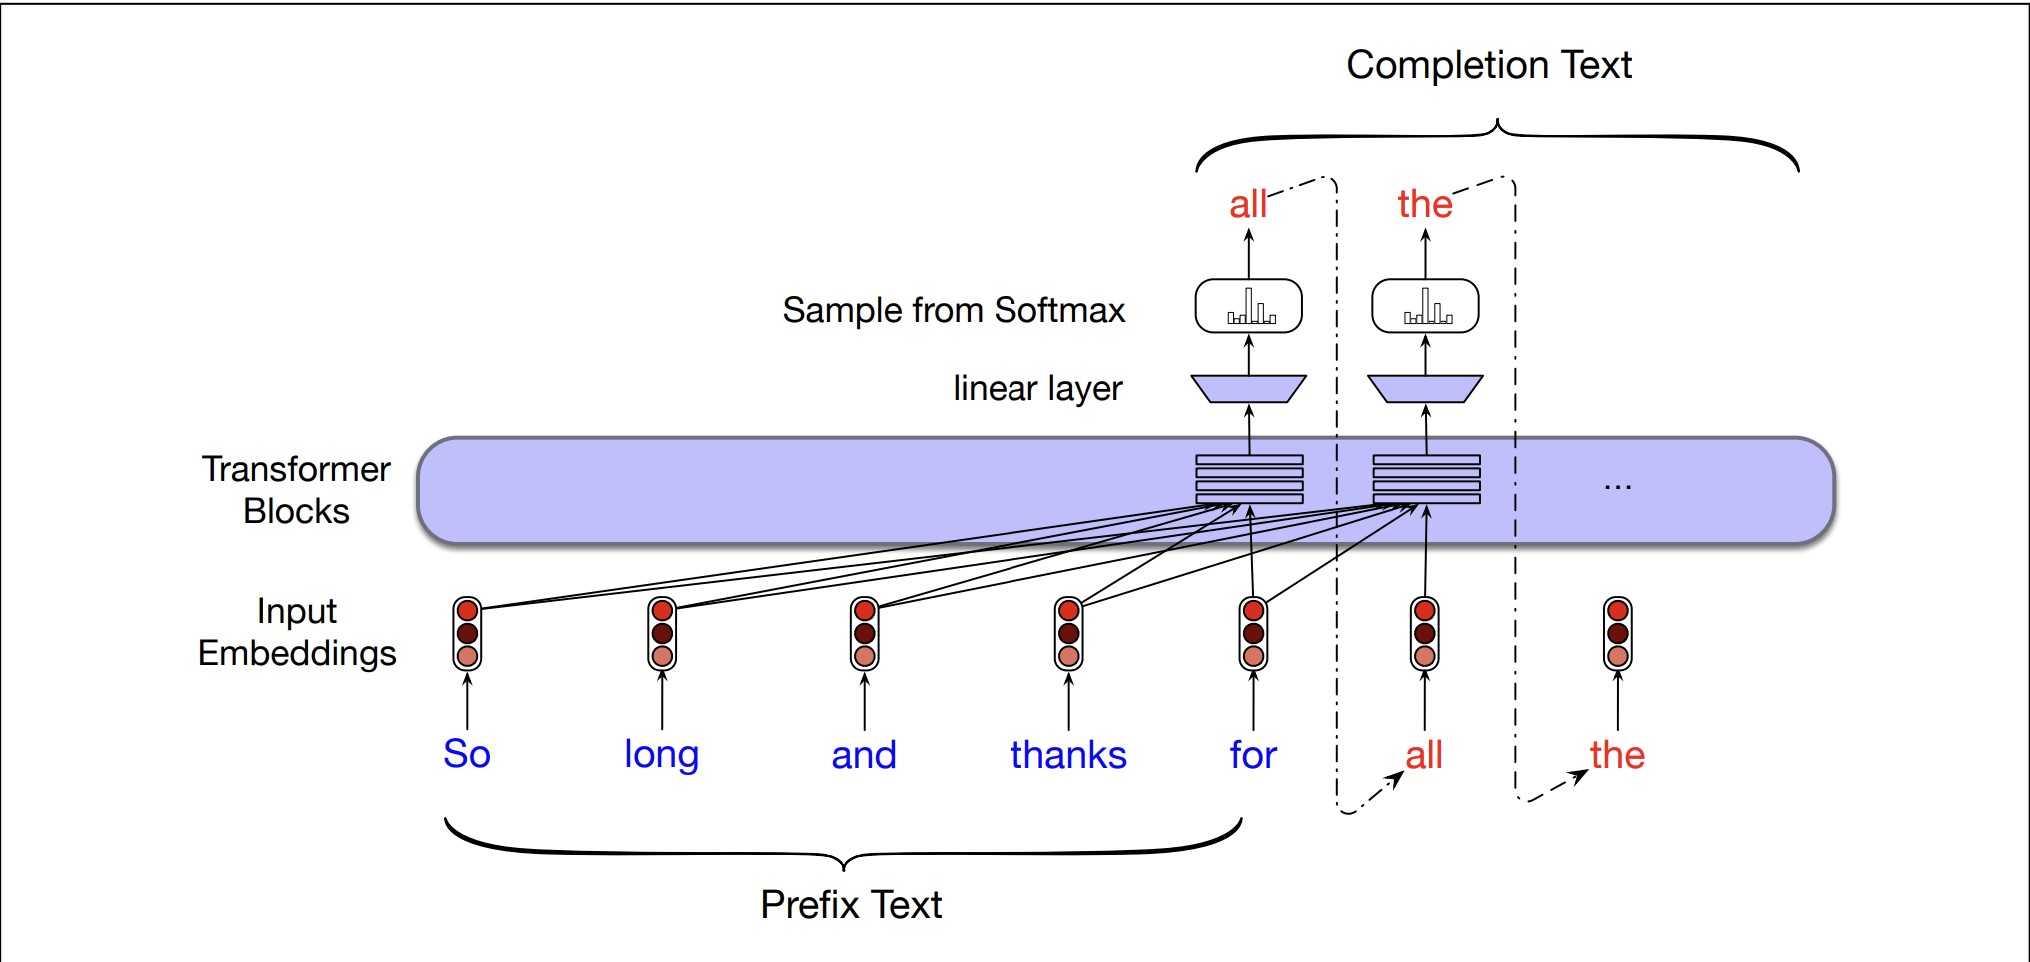

## Pegasus  - Explained 

### Introduction

Pegasus is a new pre-training technique developed by Google AI researchers that will perform better for models that will be fine-tuned for abstractive summarization. 

Among the most interesting downstream tasks coming out of natural language processing is Abstractive Summarization, where a model writes a unique summary of a document or a collection of documents.

Abstractive summarization consists of writing a summary of a document or a collection of documents, as opposed to extractive summarization, which consists of returning a sentence or group of sentences containing the most information from the source documents. 

The current paradigm and natural language processing is to pre-train these language models using either auto-regressive language modeling or mass language modeling, which is used in Bert.

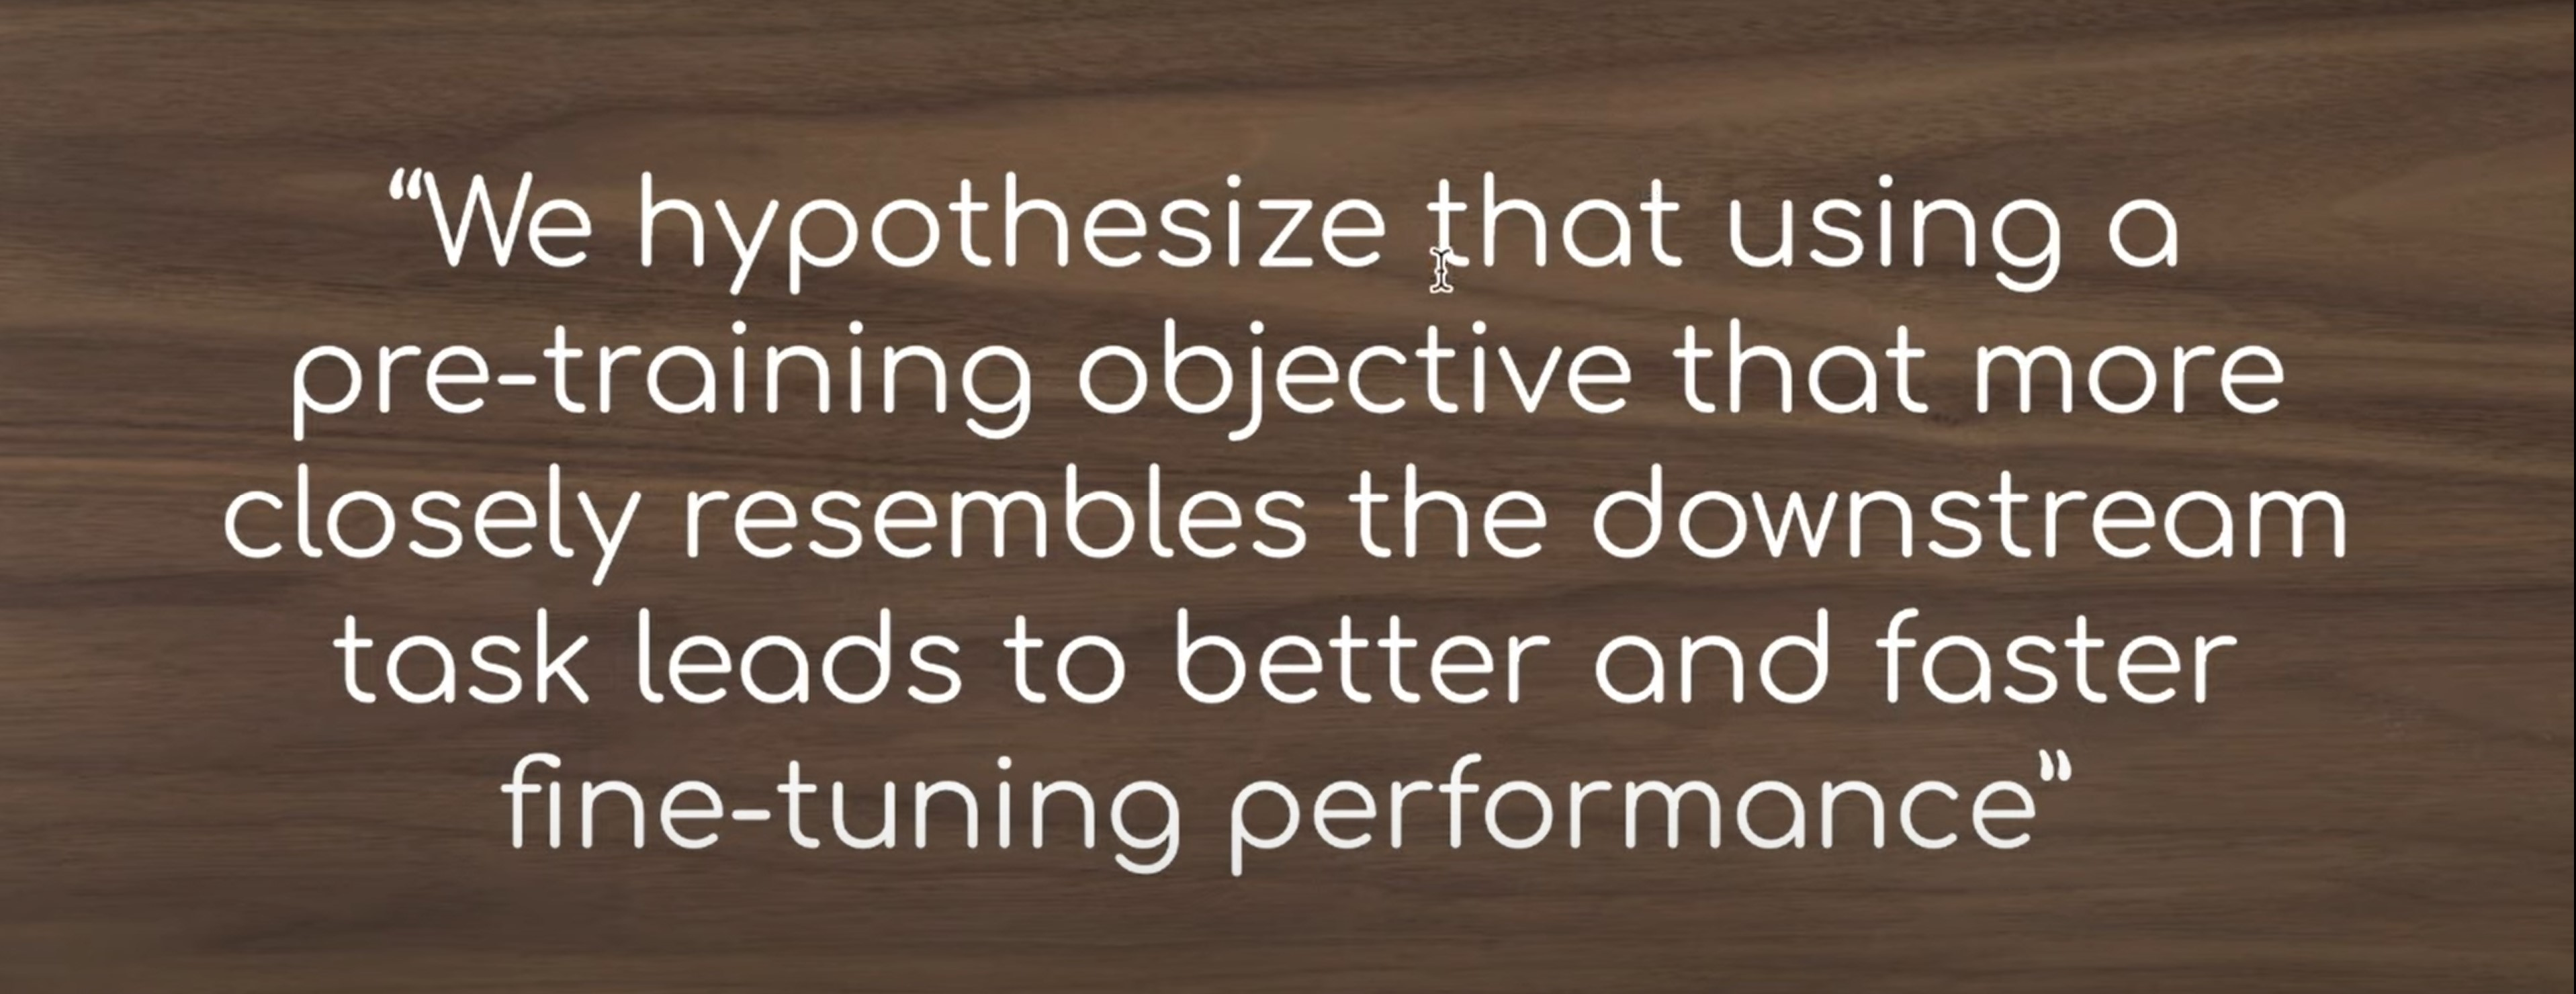



1. Recently, the TL;DR dataset has gained attention in the machine learning research community. They generate, using the "Bert" model, one- or two-line summaries of machine learning research papers based on https://openreview.net.

2. The current practice for this task (self-supervised auto-regressive language modeling) would be to pre-train a language model by iteratively predicting a masked-out token at the end of a sequence.

3. Next, you fine-tune that model on a set of labeled summaries. You hope it can generalize to a new document or collection of documents and compose a new summary for this new document that has yet to be seen in the training set.

4. This one-size-fits-all paradigm of pre-training and fine-tuning does not cover all the tasks, so Pegasus designs a new pre-training objective that is more aligned with downstream fine-tuning. 

### Gap sentences generation

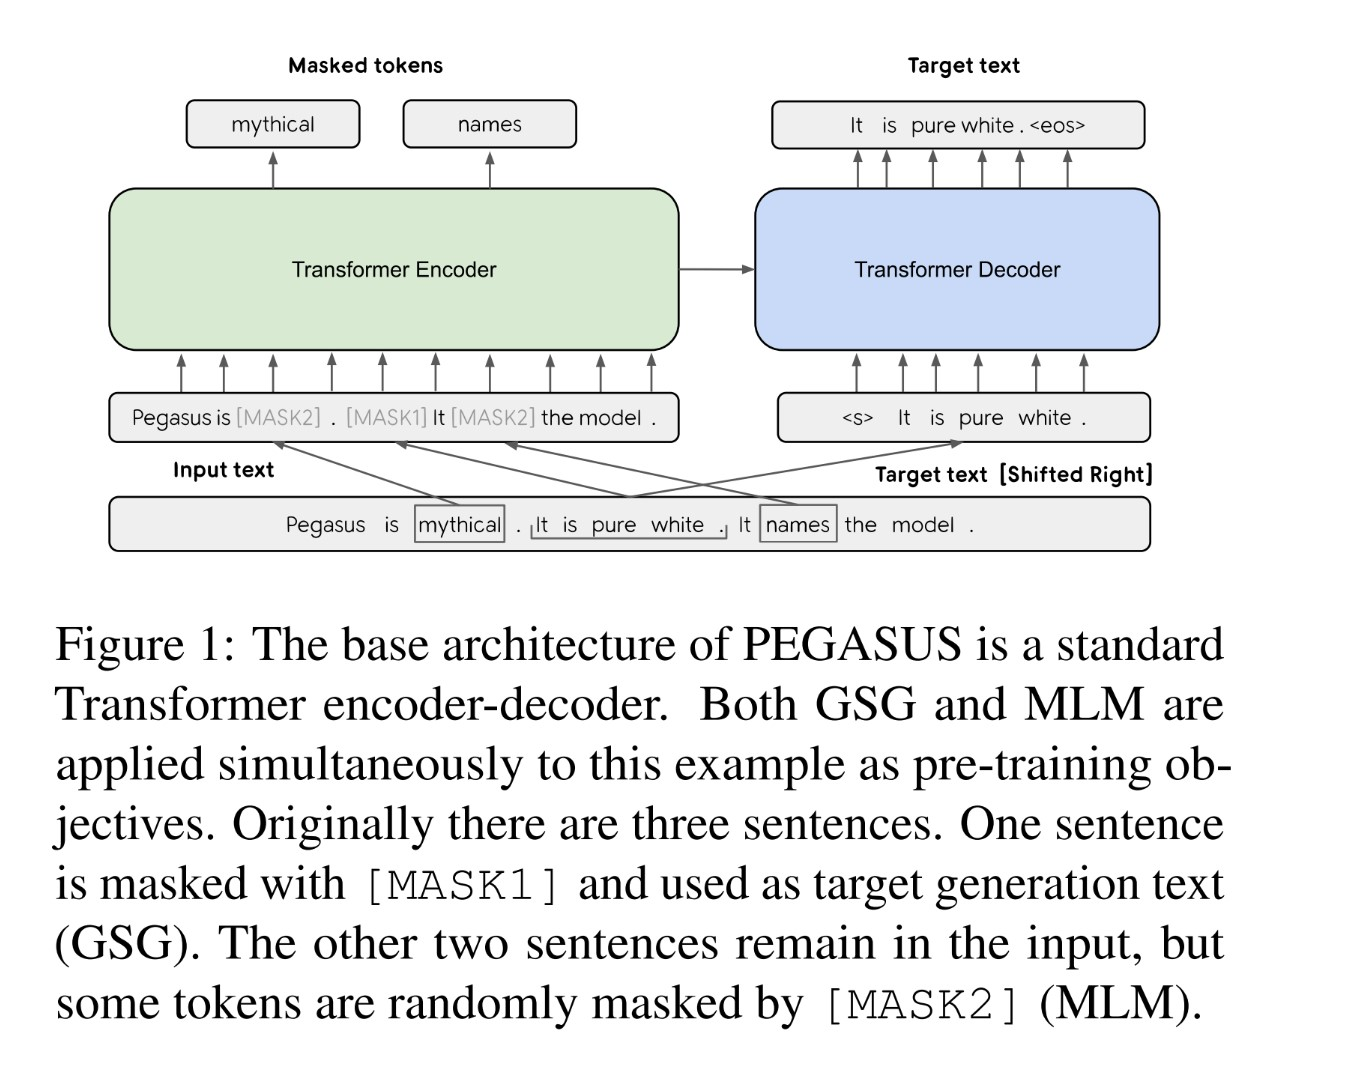

The new pre-training task presented in Pegasus uses gap sentence generation. 
The idea that we have a document or a collection of documents and we're going to mask out entire sentences is better aligned with the task of abstractive summarization because it teaches the model how to aggregate this information to predict a massive amount of intermediate context compared to just mass language modeling where we just mask out one token. 

The Gap Sentence Generation algorithm is a variant of the PEGASUS  natural language processing model developed by researchers at Google. 

The Gap Sentence Generation algorithm is used to pre-train PEGASUS on a large dataset of text, such as articles from Wikipedia. 

The algorithm first divides the text into individual sentences. Then, for each sentence, it randomly selects a contiguous span of words within the sentence and replaces them with a special "gap" token. The resulting sentence, with the gap token in place of the removed span of words, is called a "gap sentence."

The Gap Sentence Generation algorithm then creates a large dataset of gap sentences by repeating this process on many different sentences from the text. This dataset is used to pre-train PEGASUS, which is then fine-tuned on a specific task, such as summarization or machine translation.

The use of gap sentences allows PEGASUS to learn a more general representation of language, as it must learn to predict the missing words in the gap sentence based on the context provided by the surrounding words. 

This can make the model more effective at handling novel and out-of-context text, which is important for tasks such as summarization, where the input text may be highly varied and abstract.

The whole idea of pegasus is really not very complicated it's just to mask out an intermediate sentence, and then there are all sorts of ablations about exactly the ratio of how many sentences compared to the overall length of the document we're going to mask out and how we're gonna search for which sentences to mask out.

#### Which sentences are we going to mask out

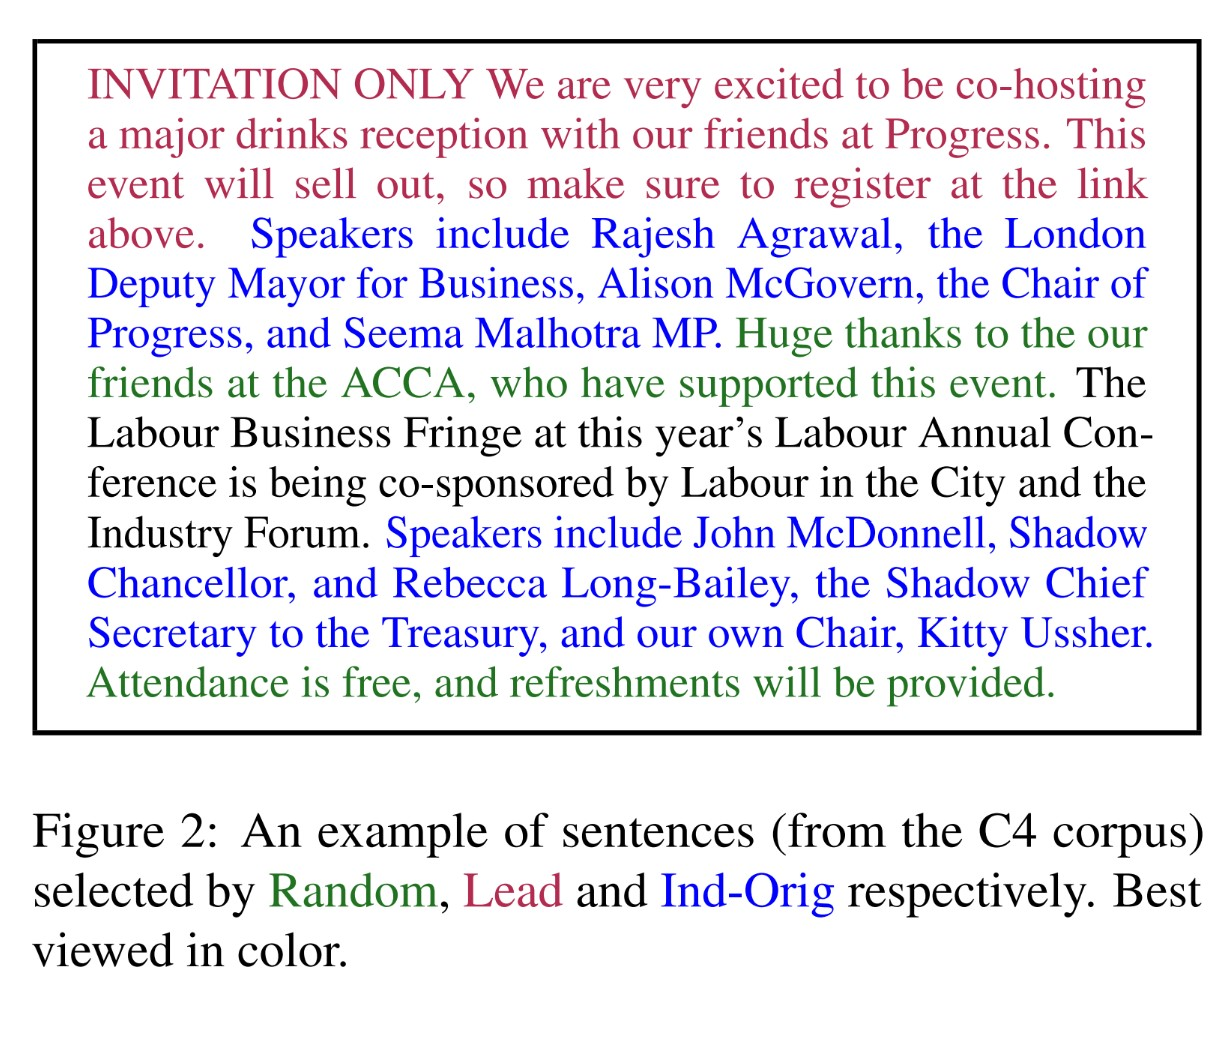

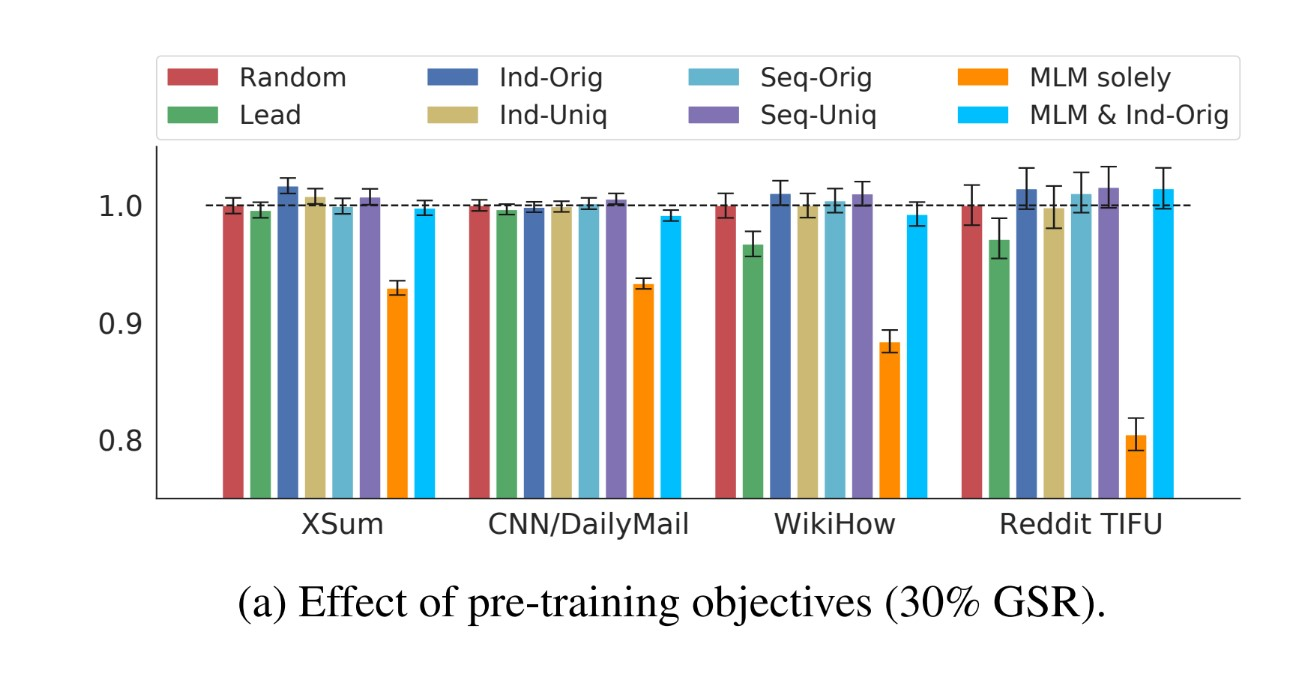

#### Gap Sentence Ratio 

**How many sentences should we mask-out?** 

Obviously the less this sentences we masked out ig going to be more computationally efficent. Because we only have to decode these masked out sentences. The less that we mask out the faster this is going to run. 

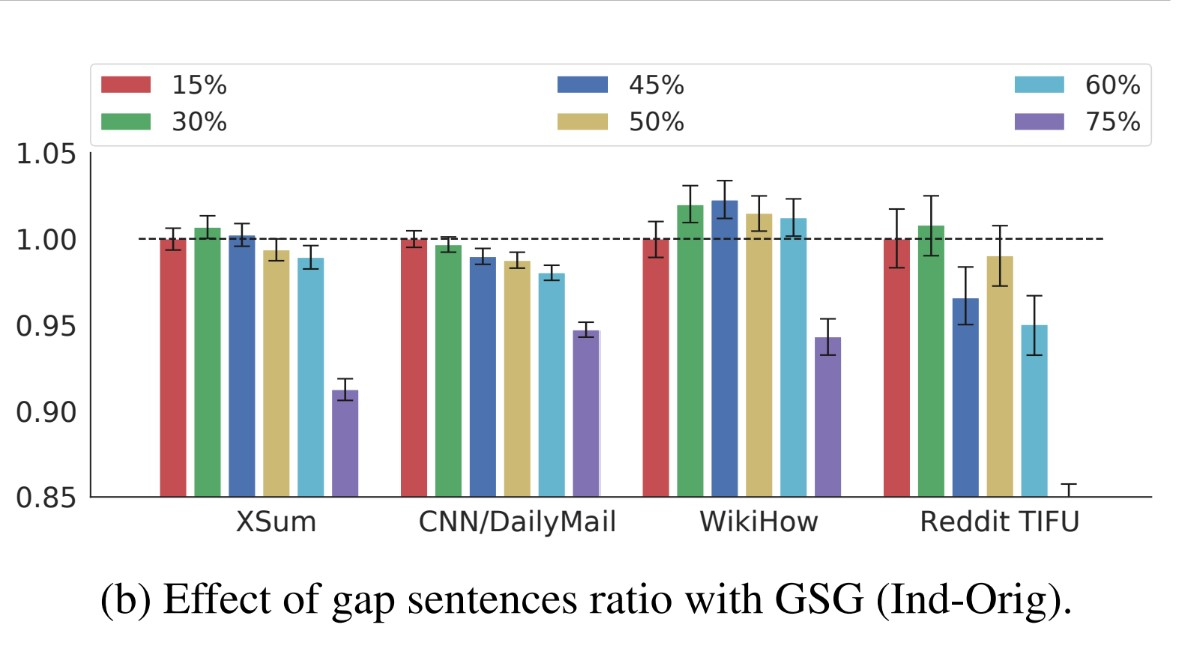

Gap sentence ratio it's a similar idea to the mask rate on Bart. 
How many of these sentences are we gonna mask out if we have these long source documents? 
The less these sentences we mask out is gonna be more computationally efficient because we only gonna have to decode the masked-out sentence,  the faster is going to run and our pre-training.

### Pre-training data

Another interesting detail of pegasus is that it will explore the data set used for pre-training. Is this massive data set that comes from scraping the entire Internet and getting all the text off the Internet compared to this data set the introduced HugeNews (a collection of news and news-like websites that have been filtered based on these domains from high-quality publishers and different things like high school newspapers).
You will be pre-training this model with the pegasus objective on this news article data set compared to just the entire internet.  

In addition to exploring the HugeNews data set for pre-training, PEGASUS is studying a lot of different abstractive summarization data sets, so we pre-train it on huge news and fine-tune it on these different summarization data sets like extreme summarization, CNN, etc. 

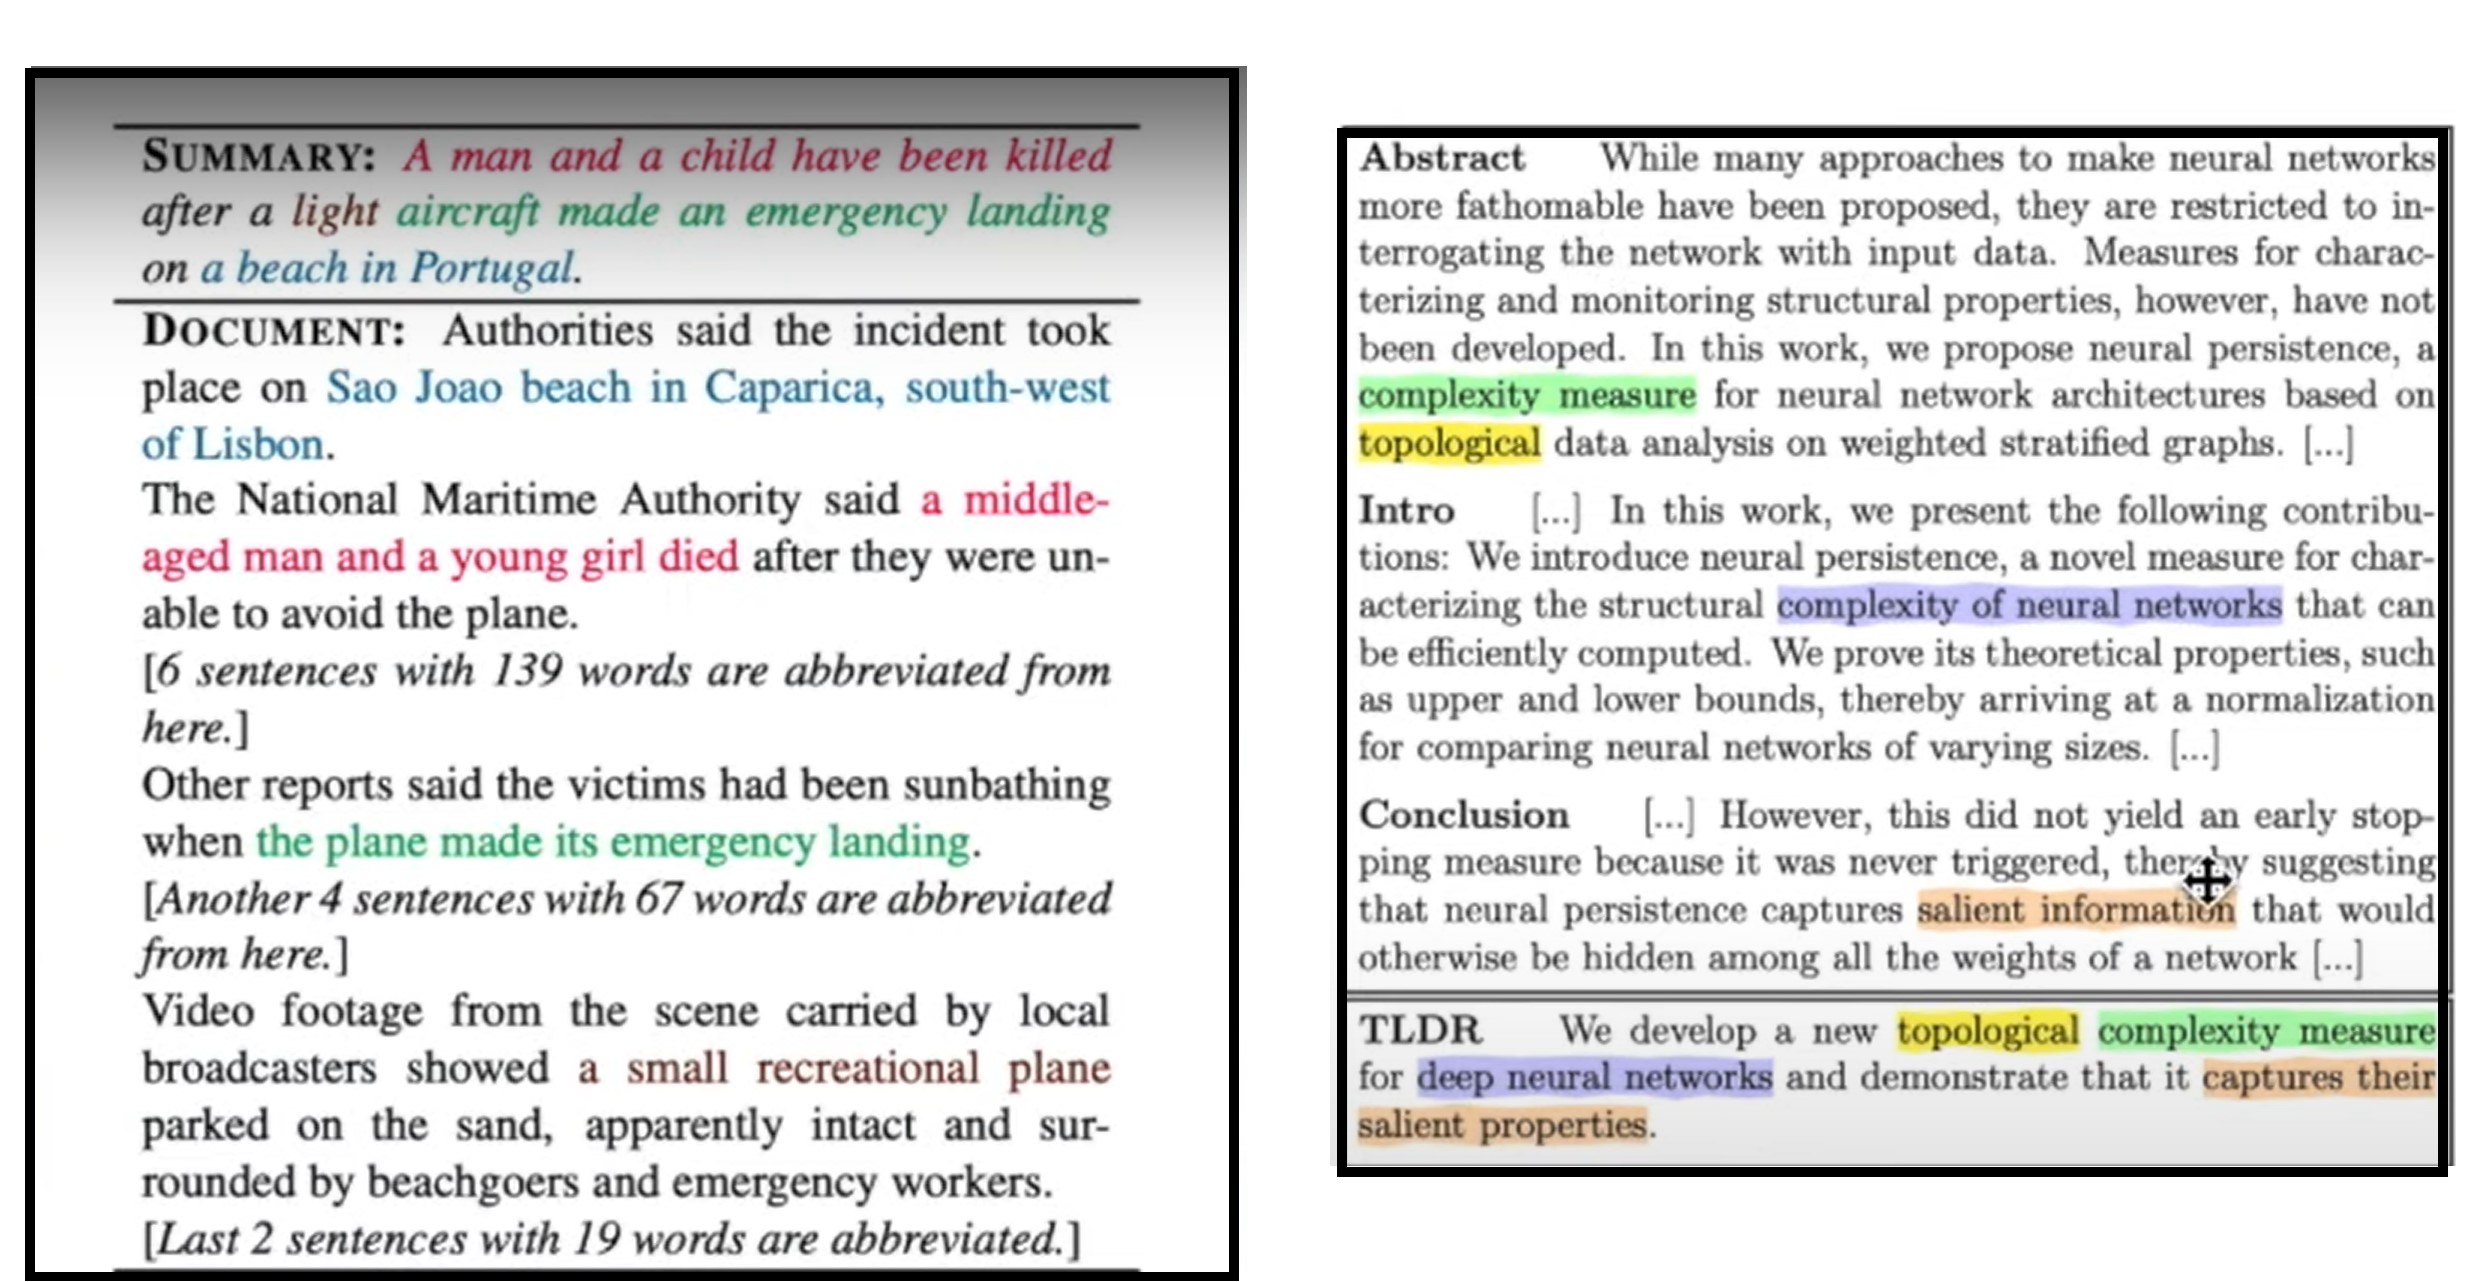

#### Loss Function

The specific loss function used by the PEGASUS model is not specified in the research paper. However, it is common for transformer-based language models to use a variant of the cross-entropy loss function, which measures the difference between the model's predicted probability distribution over the words in the vocabulary and the true distribution.
The vocabulary of words 

### Abstractive summarization - Compering results using Rouge (N, L & W) metric

#### ROUGE metric

ROUGE (Recall-Oriented Understudy for Gisting Evaluation) is a metric for evaluating the quality of text summaries. It was developed for the task of automatic summarization, but has also been used for other natural language processing tasks such as machine translation and document classification.

ROUGE compares a set of reference summaries to a set of generated summaries and calculates the overlap between the two. The reference summaries are typically human-generated and are used as the ground truth to evaluate the performance of the generated summaries.

There are several variants of the ROUGE metric, including ROUGE-N, ROUGE-L, and ROUGE-W, which measure the overlap between the summaries in terms of n-grams, longest common subsequences, and skip-grams, respectively. The ROUGE metric produces a score for each variant, which ranges from 0 to 1, with higher values indicating a higher level of overlap and therefore a better-quality summary.

ROUGE is widely used in the field of natural language processing and has been found to be highly correlated with human judgment of summary quality. However, it is important to note that ROUGE is not a perfect evaluation metric and can be sensitive to certain types of errors, such as those related to formatting or lexical choice.

#### Results

Exploring the pegasus pre-training task shows that pre-training this gap sentences generation task performs better when you fine-tune it for abstractive summarization datasets where you're trying to generate a summary from a source document

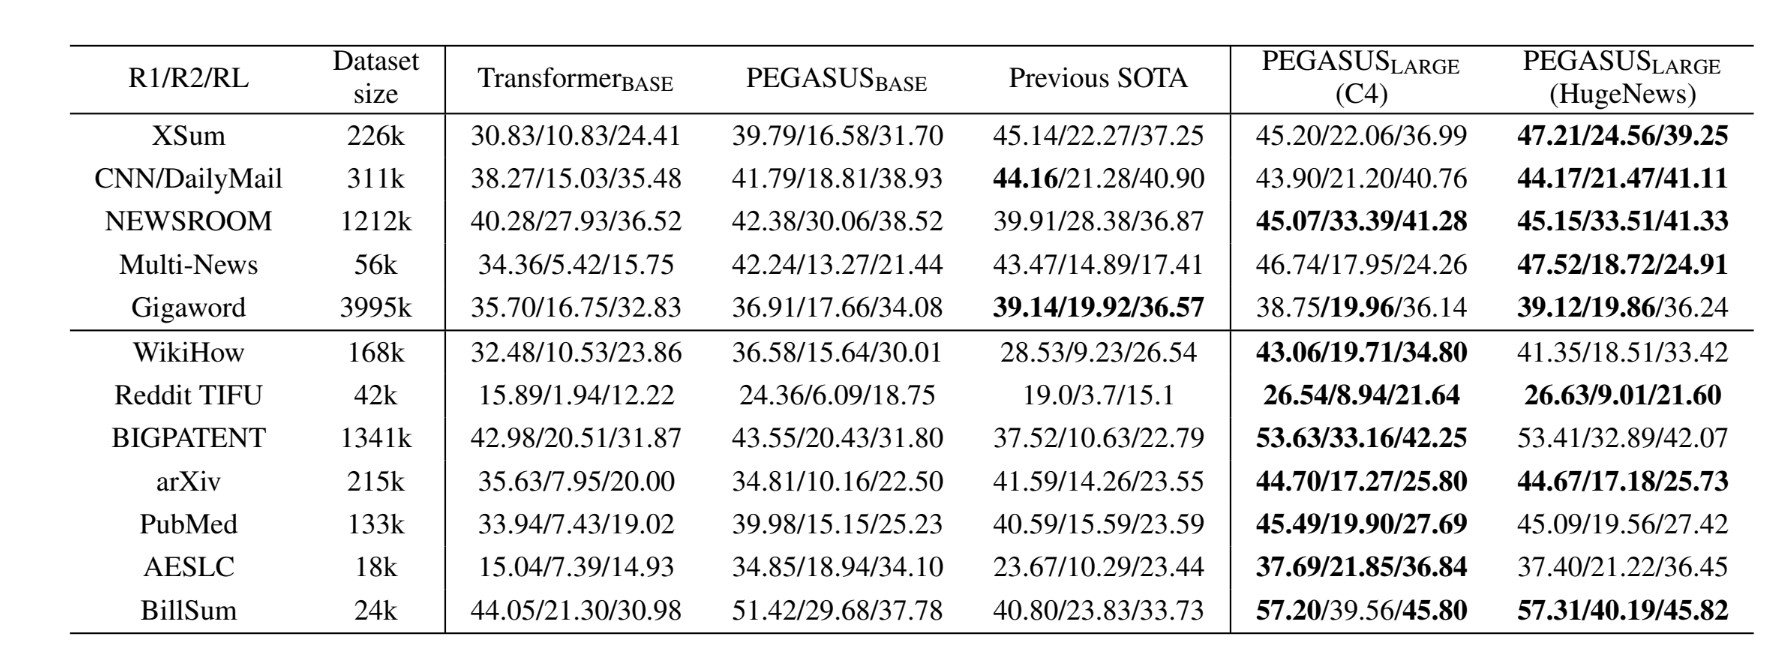

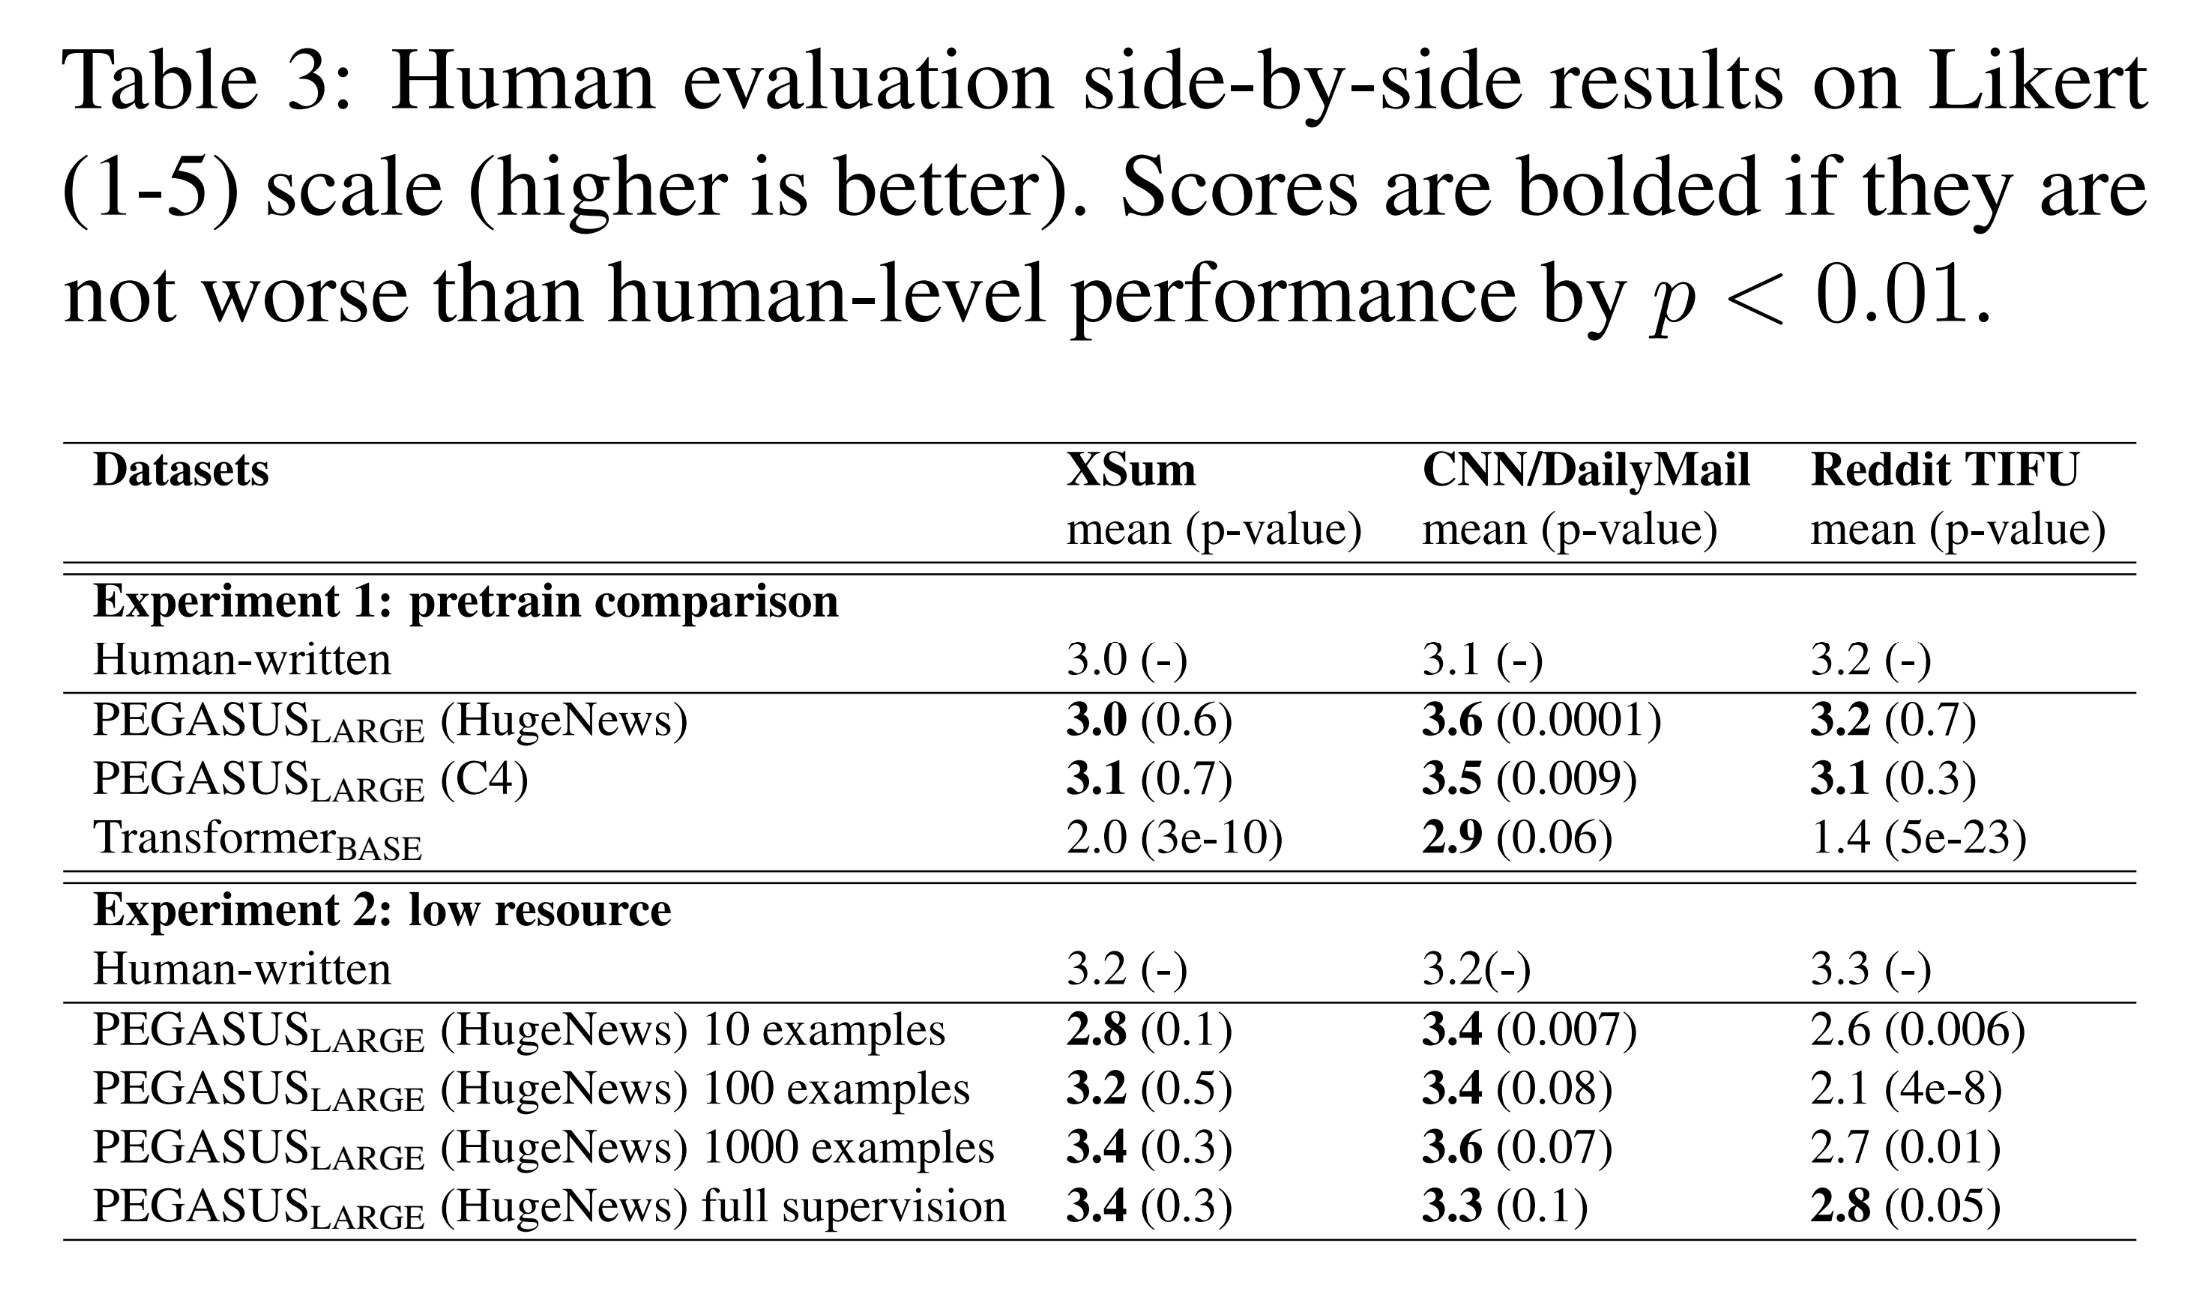

### Examples

##### download pretrained tokenizer

In [ ]:
tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-large")

In [ ]:
xsum_tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")

*Table 1.1*

##### download pretrained model

In [ ]:
model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-large")

In [ ]:
xsum_model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

##### Python Wikipedia Page

In [ ]:
text_python = """
Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.[32]

Python is dynamically-typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.[33][34]

Guido van Rossum began working on Python in the late 1980s as a successor to the ABC programming language and first released it in 1991 as Python 0.9.0.[35] Python 2.0 was released in 2000 and introduced new features such as list comprehensions, cycle-detecting garbage collection, reference counting, and Unicode support. Python 3.0, released in 2008, was a major revision that is not completely backward-compatible with earlier versions. Python 2 was discontinued with version 2.7.18 in 2020.[36]

Python consistently ranks as one of the most popular programming languages
"""


In [ ]:
tokens = tokenizer(text_python, truncation=True, padding="longest", return_tensors="pt")
xsum_tokens = xsum_tokenizer(text_python, truncation=True, padding="longest", return_tensors="pt")

In [ ]:
summary = model.generate(**tokens, max_new_tokens=100)
xsum_summary = xsum_model.generate(**xsum_tokens, max_new_tokens=100)

In [ ]:
xsum_summary[0]

In [ ]:
tokenizer.decode(summary[0])

In [ ]:
xsum_tokenizer.decode(xsum_summary[0])

##### Pride & Prejudice - first chapter

In [ ]:
with open("pride and prejudice.txt") as file:
  text_pap = file.read().split("Chapter ")[1][9:]

In [ ]:
text_pap

In [ ]:
tokens = tokenizer(text_pap, truncation=True, padding="longest", return_tensors="pt")
xsum_tokens = xsum_tokenizer(text_pap, truncation=True, padding="longest", return_tensors="pt")

In [ ]:
summary = model.generate(**tokens, max_new_tokens=100)
xsum_summary = xsum_model.generate(**xsum_tokens, max_length=len(text_pap))

In [ ]:
tokenizer.decode(summary[0])

In [ ]:
xsum_tokenizer.decode(xsum_summary[0])

##### TL;DR - reddit post summirazition 

In [ ]:
# TL;DR - reddit post summirazition 
text = """
POST
Subreddit: r/relationships
TITLE: Help! My [24F] boyfriend [28M] is neglecting his studies and our relationship.... Because
of a video game.
Hi Reddit. My boyfriend and I have been dating for a year and it has been great. Except for one
thing.
DOTA. He plays it at least 2 hours a day, and on the weekends, all day if he can. If you know
that game you know it takes at least an hour on average per game and is one that you can’t really
pause. Sometimes it is fine that he plays, I don’t mind sitting on my phone, browsing Reddit.
However, lately it seems like it has interfered in our relationship as well as his studies. He is doing
his PH.D. in Physics. He is obviously very swamped with schoolwork that he seems to put on the
back burner for this game. The other day, on a Saturday, I was over and he was playing a game. I
thought it would just be one but instead he proceeded to play for three hours as I just sat there.
What can I do? I have tried talking to him... Even saying this game is making me rethink our
relationship! He says he understands, but isn’t proving it through his actions!
Reddit, what should I do? I really care about this guy and besides this gaming habit, our
relationship is great!
"""

In [ ]:
tokens = tokenizer(text, truncation=True, padding="longest", return_tensors="pt")
xsum_tokens = xsum_tokenizer(text, truncation=True, padding="longest", return_tensors="pt")

In [ ]:
summary = model.generate(**tokens, max_new_tokens=100)
xsum_summary = xsum_model.generate(**xsum_tokens, max_length=len(text))

In [ ]:
tokenizer.decode(summary[0])

In [ ]:
xsum_tokenizer.decode(xsum_summary[0])

**Human Feedback Summarization results**

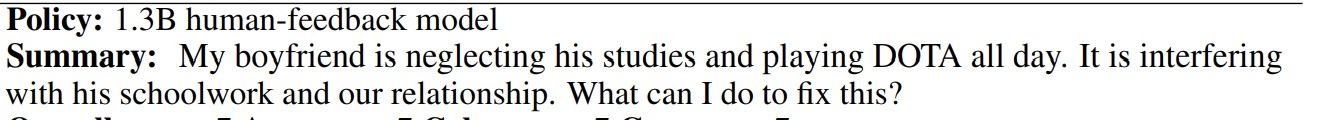

**ChatGPT Summarization results**

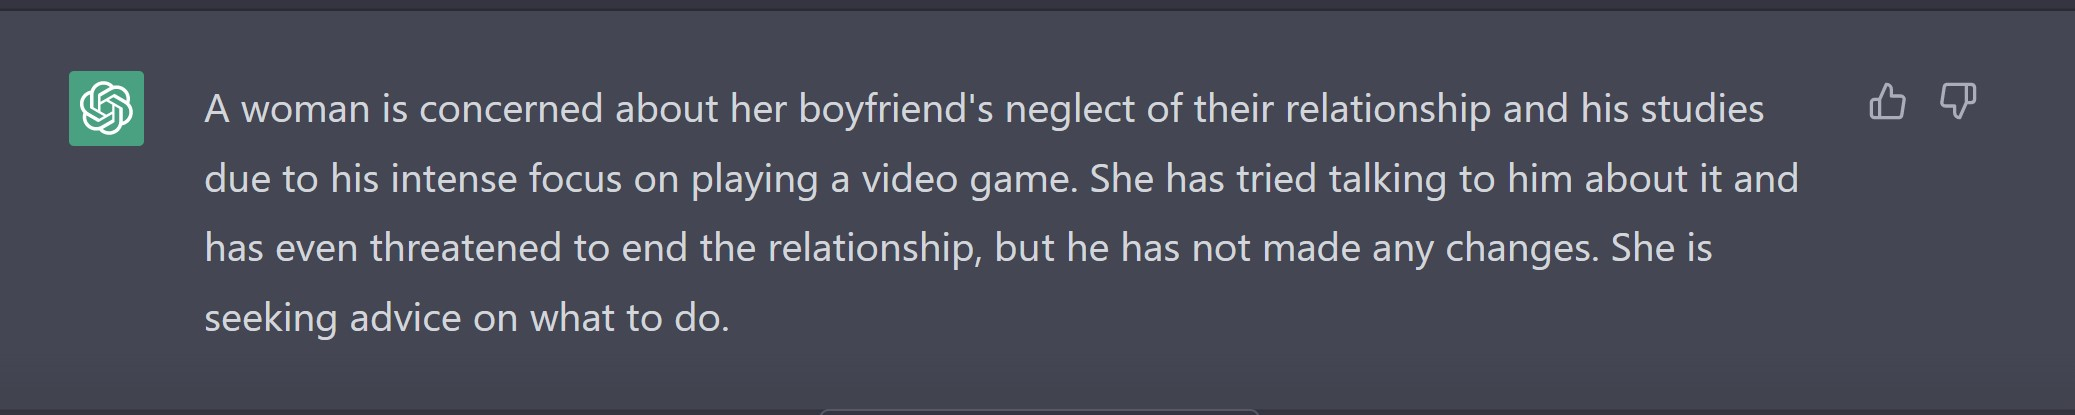